In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [2]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     plt.axes('off')
    plt.imshow(img)
    plt.show()
    return img

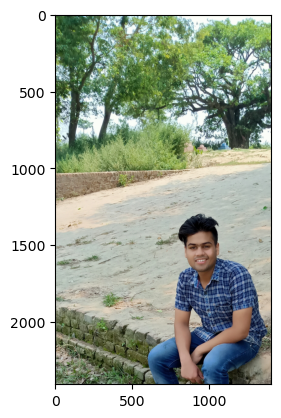

In [22]:
filename='IMG_20200516_131457.jpg'
img=read_file(filename)
org_img=np.copy(img)

# create edge mask

In [4]:
def edge_mask(img,line_size,blur_value):
    '''
       input: input Image
       output:Edges of Images
       '''
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

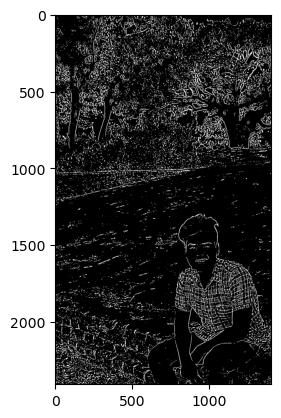

In [5]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap='binary')
plt.show()

# Reduce the Color Palette 

In [17]:
def color_quantization(img,k):
    # transform the image
    data=np.float32(img).reshape((-1,3))
    # Determine the Criteria
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    # implementing K-means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

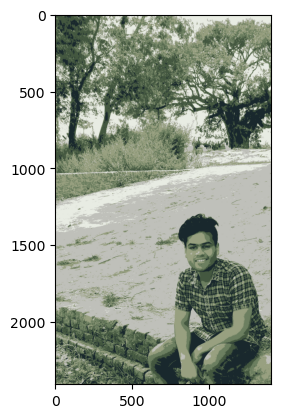

In [18]:
img=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

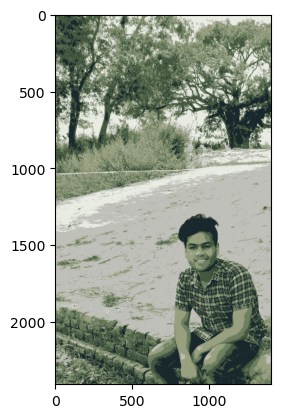

In [19]:
## Reduce the noise
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

# Combine the edge mask with quantize image


In [23]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("cartoonified image")
    plt.show()
    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()

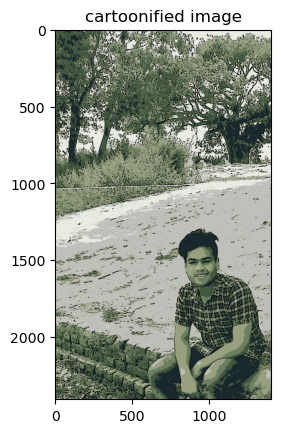

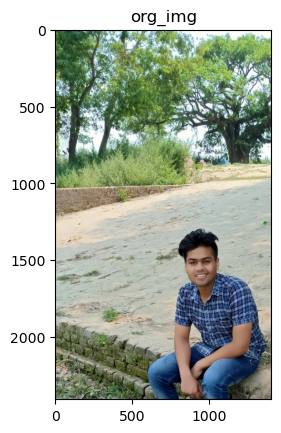

In [24]:
cartoon()